In [261]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [262]:
workhr_nepal_1998_df = pd.read_csv('../data/1998/workinghr1998.csv')
workhr_nepal_2008_df = pd.read_csv('../data/2008/workinghr2008.csv')
workhr_nepal_2018_df = pd.read_csv('../data/2018/workinghr2018.csv')

Lets first create a single dataframe combining these three datas

In [263]:
workhr_nepal_1998_df['year'] = 1998
workhr_nepal_2008_df['year'] = 2008
workhr_nepal_2018_df['year'] = 2018

workhr_nepal_df = pd.concat([workhr_nepal_1998_df, workhr_nepal_2008_df, workhr_nepal_2018_df])



In [264]:
workhr_nepal_df.head()

,Occupation,Total,Male,Female,year
0,Total,39.4,42.6,36.3,1998
1,Legislators senior officials,51.0,51.8,41.4,1998
2,Professionals,39.7,40.1,36.3,1998
3,Technicians,39.5,39.6,39.0,1998
4,Clerks,44.1,44.4,41.6,1998


In [265]:
workhr_nepal_df.describe()

,Total,Male,Female,year
count,32.000000,32.000000,32.000000,32.000000
mean,44.590625,46.900000,39.184375,2007.687500
std,5.661435,5.318076,7.102799,8.224423
min,34.000000,37.000000,21.000000,1998.000000
25%,40.125000,42.900000,34.950000,1998.000000
50%,44.000000,46.400000,39.950000,2008.000000
75%,48.000000,51.000000,42.700000,2018.000000
max,58.600000,59.300000,54.500000,2018.000000


### Lets see the distribution of the work hours 

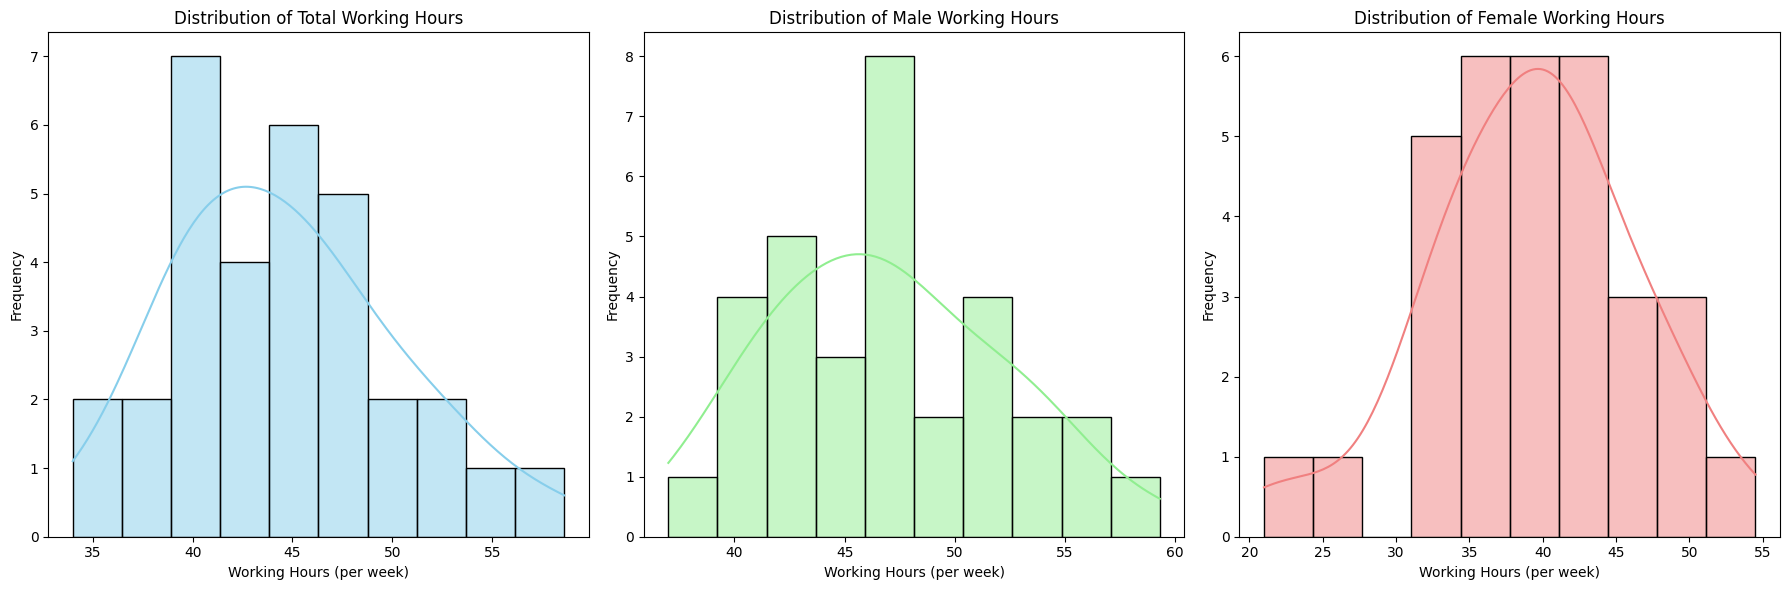

In [266]:
plt.figure(figsize=(18, 6))

# Total working hours histogram
plt.subplot(1, 3, 1)
sns.histplot(workhr_nepal_df['Total'], kde=True, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Working Hours')
plt.xlabel('Working Hours (per week)')
plt.ylabel('Frequency')

# Male working hours histogram
plt.subplot(1, 3, 2)
sns.histplot(workhr_nepal_df['Male'], kde=True, bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Male Working Hours')
plt.xlabel('Working Hours (per week)')
plt.ylabel('Frequency')

# Female working hours histogram
plt.subplot(1, 3, 3)
sns.histplot(workhr_nepal_df['Female'], kde=True, bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Female Working Hours')
plt.xlabel('Working Hours (per week)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


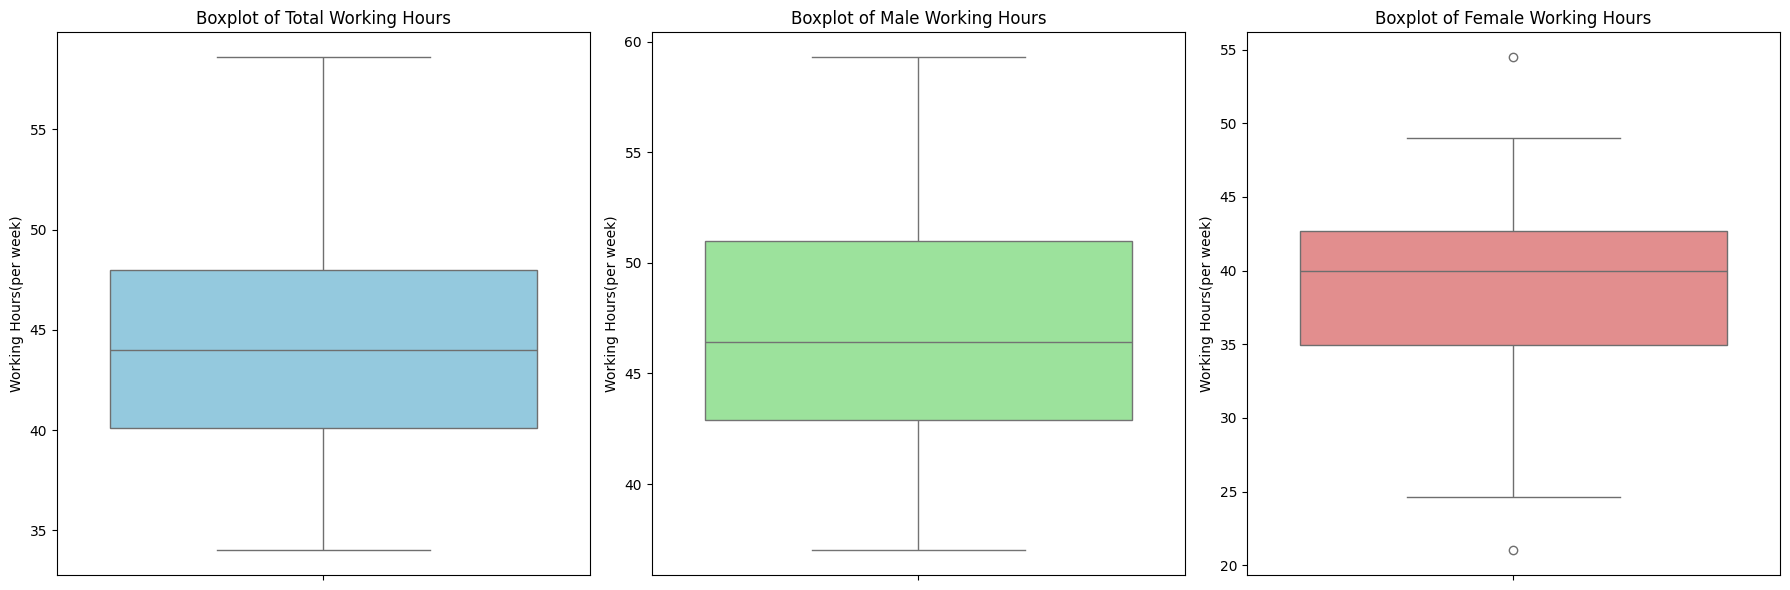

In [267]:
plt.figure(figsize=(18, 6))

# Total working hours box-plot
plt.subplot(1, 3, 1)
sns.boxplot(workhr_nepal_df['Total'], color='skyblue')
plt.title('Boxplot of Total Working Hours')
plt.ylabel('Working Hours(per week)')

# Male working hours histogram
plt.subplot(1, 3, 2)
sns.boxplot(workhr_nepal_df['Male'], color='lightgreen')
plt.title('Boxplot of Male Working Hours')
plt.ylabel('Working Hours(per week)')

# Female working hours histogram
plt.subplot(1, 3, 3)
sns.boxplot(workhr_nepal_df['Female'], color='lightcoral')
plt.title('Boxplot of Female Working Hours')
plt.ylabel('Working Hours(per week)')

# Show the plots
plt.tight_layout()
plt.show()


### Now, lets analyze the trends of working hour over the three surveys(1998 -> 2008 -> 2018)

In [268]:
# This function modifies our work hour data frame so that we can make a barplot
def modify_for_barplot(df):
    male_hr = df['Male']
    Female_hr = df['Female']
    combined_hr = pd.concat([male_hr, Female_hr])
    combined_hr_df = pd.DataFrame()
    combined_hr_df['Hours'] = combined_hr.reset_index(drop= True)
    rows = combined_hr.shape[0]
    genders = ['male' if i< rows/2 else 'female' for i in range(rows)]
    combined_hr_df['gender'] = genders
    occupations = df['Occupation'].unique()
    occupation_list = list(occupations)*2
    combined_hr_df['Occupation'] = occupation_list
    return combined_hr_df

In [269]:
modified_workhr_1998_df = modify_for_barplot(workhr_nepal_1998_df)
modified_workhr_2008_df = modify_for_barplot(workhr_nepal_2008_df)
modified_workhr_2018_df = modify_for_barplot(workhr_nepal_2018_df)



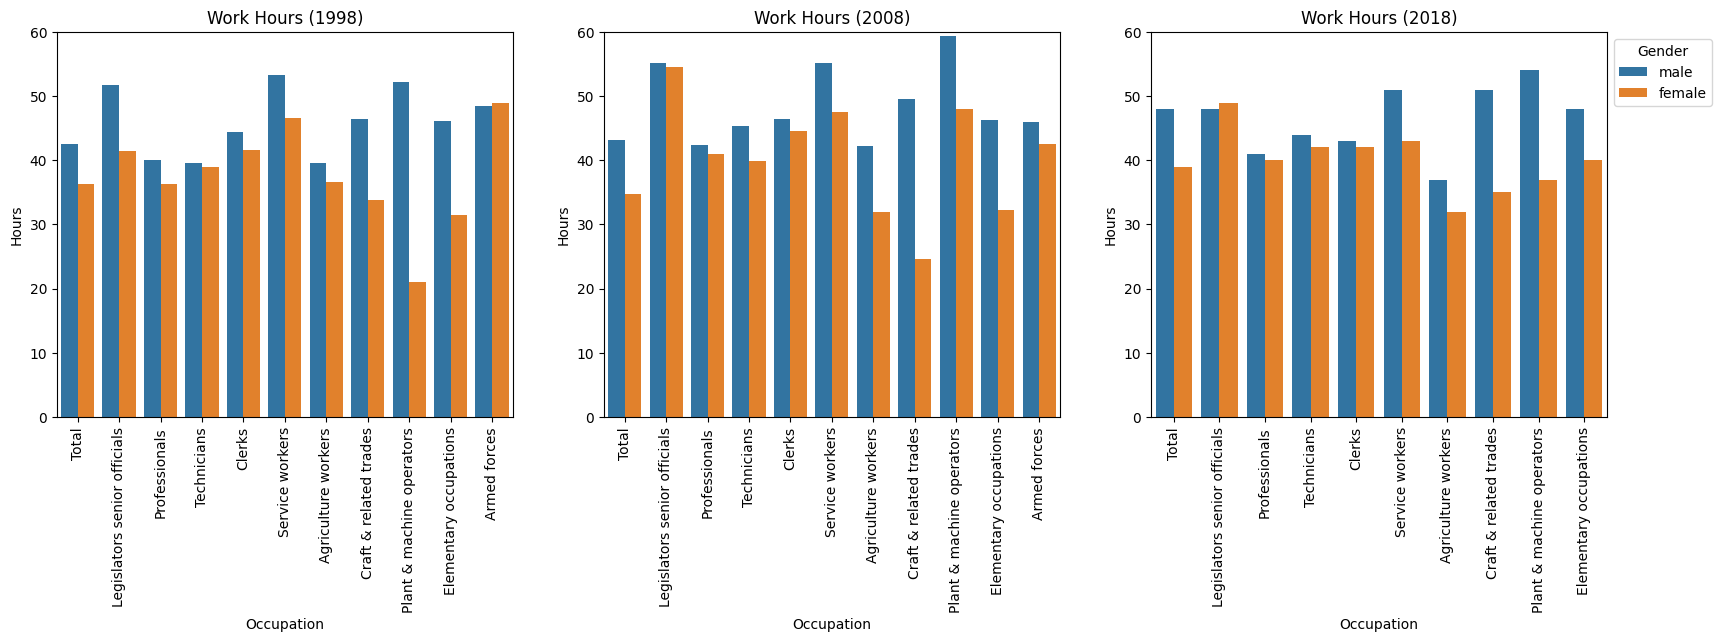

In [270]:

datasets = [
    (modified_workhr_1998_df, "Work Hours (1998)"),
    (modified_workhr_2008_df, "Work Hours (2008)"),
    (modified_workhr_2018_df, "Work Hours (2018)")
]

fig,ax =plt.subplots(1,3,figsize = (20,5))

for i, (df, title) in enumerate(datasets):
    sns.barplot(df, x = 'Occupation', y = 'Hours', hue='gender', ax= ax[i])
    ax[i].tick_params(axis="x",rotation = 90)
    ax[i].set_title(title)
    ax[i].set_ylim(0,60)
    if i != 2:
        ax[i].get_legend().set_visible(False)

# Show legend only on the last subplot
ax[2].legend(title='Gender', loc='upper left',bbox_to_anchor=(1,1))





- In the barplot, we can see that the plot looks fairly consistent through the year for a particular occupation. We can see the slight increase in total working hours from 1998 to 2018. 
- The plot also highlights significant disparity in male and female working hours. For most of the occupations, men seem to work more hours than female.
- The occupations like legislator senior officials, professionals, Technicians, clerks and Armed forces have few to no disparity between male and female. But the other occupations like service workers,agricultural workers, craft & related trades, pland & machine operators and Elementary occupations have significan amount of disparity.

/var/folders/q1/kx11j8ln18l7hx1kpcdc13l80000gn/T/ipykernel_43167/759468344.py:5: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  sns.lineplot(data=workhr_nepal_df, x='year', y='Total', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[0], legend = False)
/var/folders/q1/kx11j8ln18l7hx1kpcdc13l80000gn/T/ipykernel_43167/759468344.py:12: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  sns.lineplot(data=workhr_nepal_df, x='year', y='Male', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[1], legend = False)
/var/folders/q1/kx11j8ln18l7hx1kpcdc13l80000gn/T/ipykernel_43167/759468344.py:20: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  sns.lineplot(data=workhr_nepal_df, x='year', y='Female', hue='Occupation', linestyle="dashed", marker="o", palette=sns.col

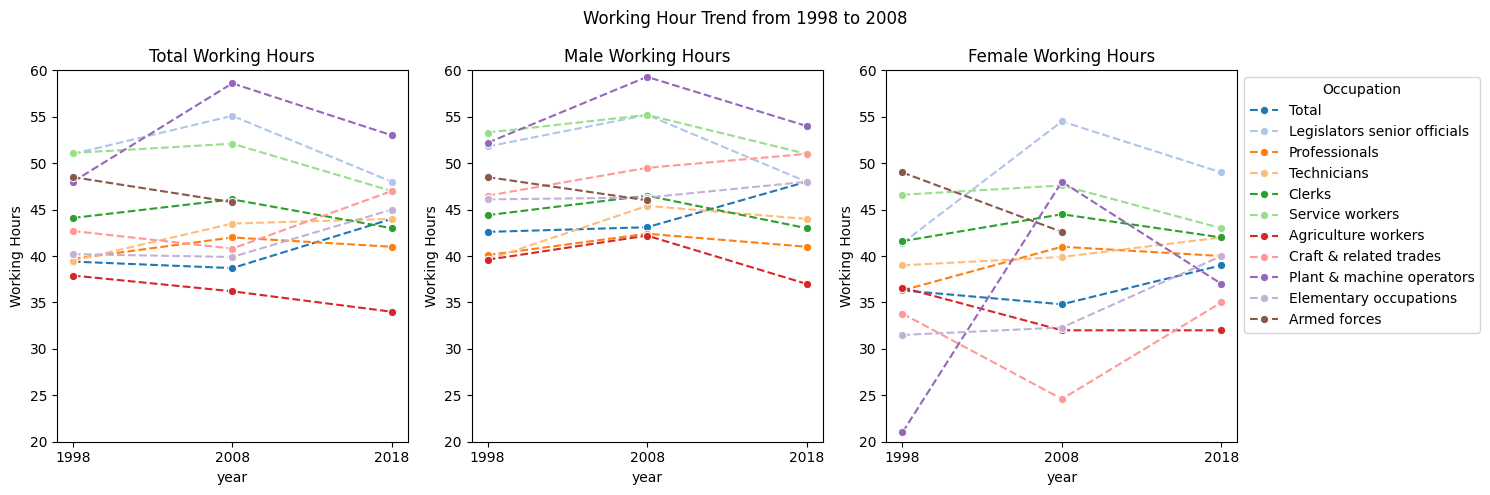

In [271]:

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Total (without individual legend)
sns.lineplot(data=workhr_nepal_df, x='year', y='Total', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[0], legend = False)
axes[0].set_title('Total Working Hours')
axes[0].set_xticks([1998, 2008, 2018])
axes[0].set_ylabel('Working Hours')
axes[0].set_ylim(20,60)

# Plot Male (without individual legend)
sns.lineplot(data=workhr_nepal_df, x='year', y='Male', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[1], legend = False)
axes[1].set_title('Male Working Hours')
axes[1].set_xticks([1998, 2008, 2018])
axes[1].set_ylabel('Working Hours')
axes[1].set_ylim(20,60)


# Plot Female (without individual legend)
sns.lineplot(data=workhr_nepal_df, x='year', y='Female', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[2])
axes[2].set_title('Female Working Hours')
axes[2].set_xticks([1998, 2008, 2018])
axes[2].set_ylabel('Working Hours')
axes[2].legend(title = "Occupation", loc = "upper left", bbox_to_anchor=(1,1))
axes[2].set_ylim(20,60)


# Set the main title
plt.suptitle('Working Hour Trend from 1998 to 2008')

# Adjust layout for better spacing
plt.tight_layout()


# Show the plot
plt.show()


- From the above line plot we can see that in total working hours seem to slightly decrease from 1998 to 2008 but then increase from 2008 to 2018.
- There are some occupations whose working hour decreased significatly comming to 2008 but there also the occupations whose working hour has increased.

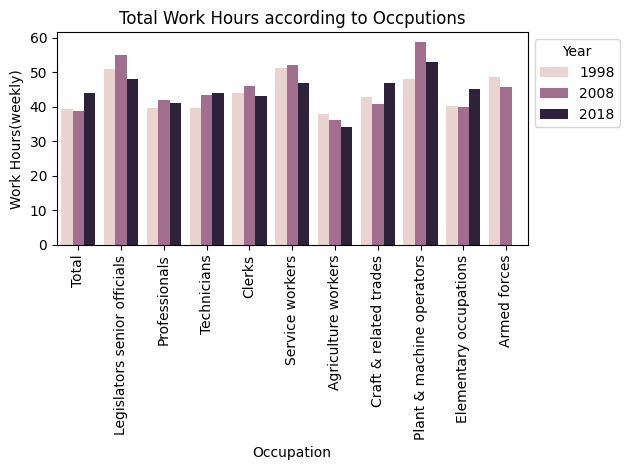

In [272]:
sns.barplot(data=workhr_nepal_df, x="Occupation", y="Total", hue='year')
plt.legend(title = "Year", loc = "upper left", bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.ylabel('Work Hours(weekly)')
plt.title("Total Work Hours according to Occputions")
plt.tight_layout()
plt.show()

# Now Lets Explore the Earning Data

In [273]:
earning_nepal_1998_df = pd.read_csv('../data/1998/Earning1998.csv')
earning_nepal_2008_df = pd.read_csv('../data/2008/Earning2008.csv')
earning_nepal_2018_df = pd.read_csv('../data/2018/Earning2018.csv')

In [274]:
earning_nepal_1998_df['year'] = 1998
earning_nepal_2008_df['year'] = 2008
earning_nepal_2018_df['year'] = 2018

#fixing the salary format of 2018 data
earning_nepal_2018_df[['Male','Female','Total']]=earning_nepal_2018_df[['Male','Female','Total']].replace({' ':''},regex=True).astype(int)

earning_nepal_df = pd.concat([earning_nepal_1998_df, earning_nepal_2008_df, earning_nepal_2018_df])

earning_nepal_2018_df

,Occupation,Male,Female,Total,year
0,Total,19464,13630,17809,2018
1,Legislators senior officials,34162,29342,33245,2018
2,Professionals,25684,14742,21065,2018
3,Technicians,26494,21838,24856,2018
4,Clerks,17021,14948,16161,2018
5,Service workers,15194,10580,14125,2018
6,Agriculture workers,13640,12816,13259,2018
7,Craft & related trades,21803,15686,21456,2018
8,Plant & machine operators,17578,9401,17404,2018
9,Elementary occupations,15033,11388,13622,2018


In [275]:
earning_nepal_df.head()

,Occupation,Total,Male,Female,year
0,Total,2143,2389,1368,1998
1,Legislators senior officials,8037,8068,7525,1998
2,Professionals,5079,5141,4631,1998
3,Technicians,2971,3057,2678,1998
4,Clerks,2832,2836,2805,1998


In [276]:
earning_nepal_df.describe()

,Total,Male,Female,year
count,32.000000,32.000000,32.000000,32.000000
mean,9553.312500,10163.687500,7612.250000,2007.687500
std,7937.751447,8448.547485,6631.062626,8.224423
min,1491.000000,1692.000000,957.000000,1998.000000
25%,3019.250000,3207.750000,2639.750000,1998.000000
50%,6247.000000,6812.500000,5139.500000,2008.000000
75%,14629.250000,15617.500000,11619.250000,2018.000000
max,33245.000000,34162.000000,29342.000000,2018.000000


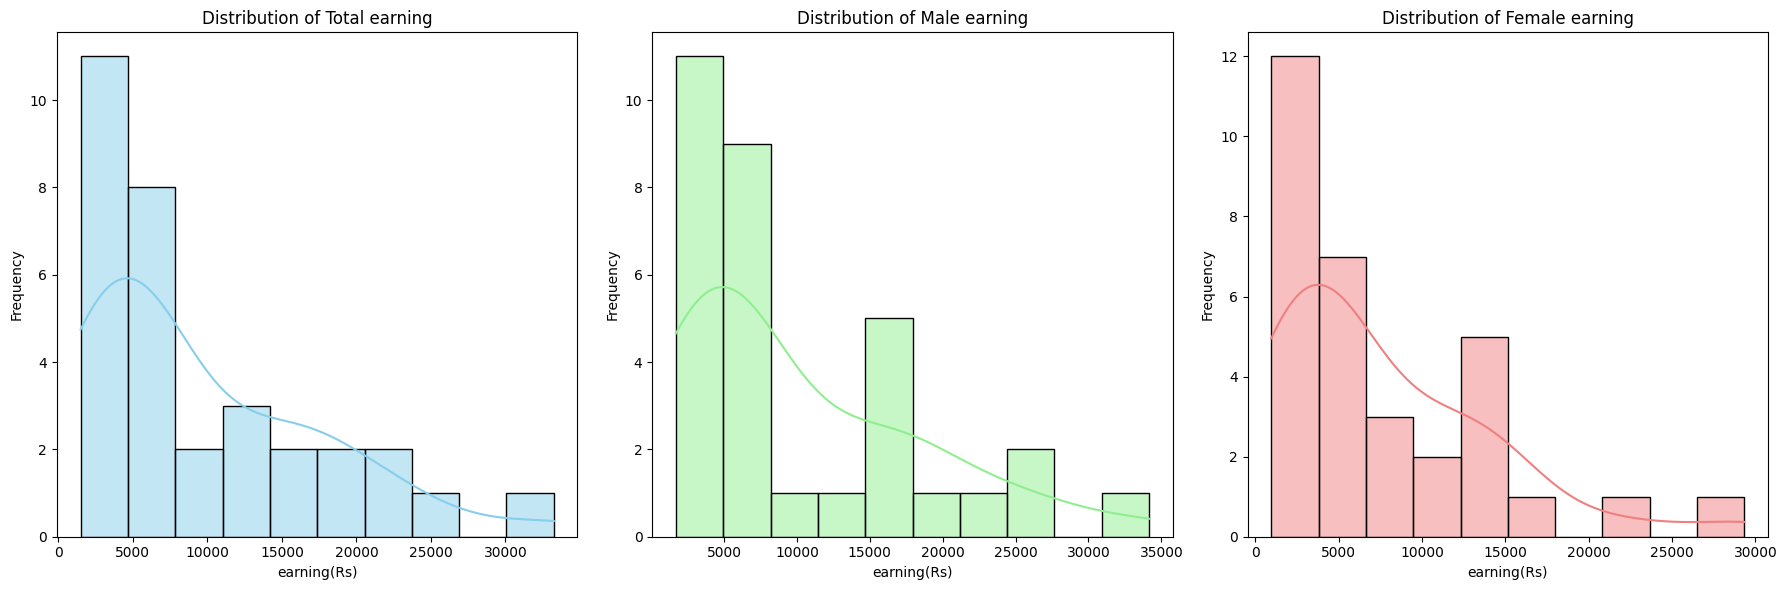

In [277]:
plt.figure(figsize=(18, 6))

# Total working hours histogram
plt.subplot(1, 3, 1)
sns.histplot(earning_nepal_df['Total'], kde=True, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total earning')
plt.xlabel('earning(Rs)')
plt.ylabel('Frequency')

# Male earning histogram
plt.subplot(1, 3, 2)
sns.histplot(earning_nepal_df['Male'], kde=True, bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Male earning')
plt.xlabel('earning(Rs)')
plt.ylabel('Frequency')

# Female earning histogram
plt.subplot(1, 3, 3)
sns.histplot(earning_nepal_df['Female'], kde=True, bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Female earning')
plt.xlabel('earning(Rs)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


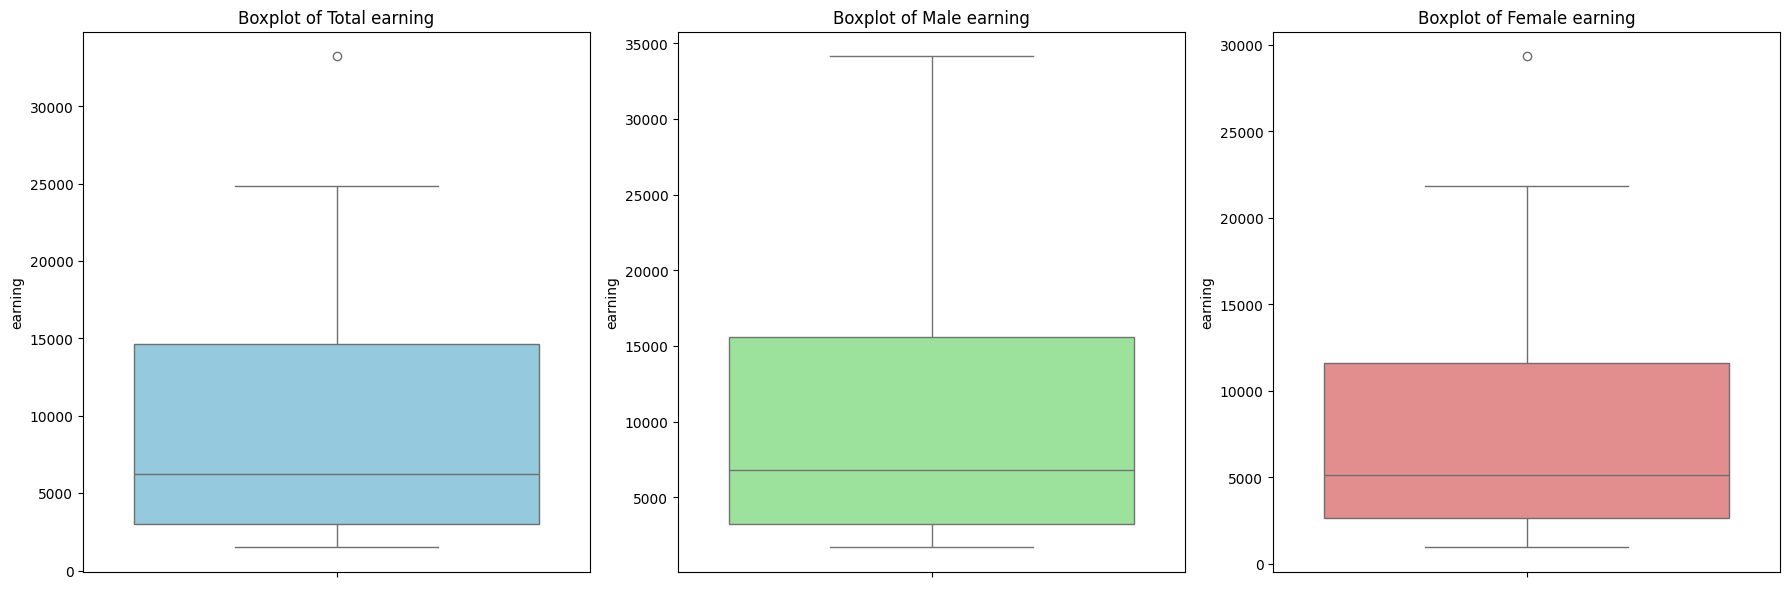

In [278]:
plt.figure(figsize=(18, 6))

# Total working hours box-plot
plt.subplot(1, 3, 1)
sns.boxplot(earning_nepal_df['Total'], color='skyblue')
plt.title('Boxplot of Total earning')
plt.ylabel('earning')

# Male earning histogram
plt.subplot(1, 3, 2)
sns.boxplot(earning_nepal_df['Male'], color='lightgreen')
plt.title('Boxplot of Male earning')
plt.ylabel('earning')

# Female earning histogram
plt.subplot(1, 3, 3)
sns.boxplot(earning_nepal_df['Female'], color='lightcoral')
plt.title('Boxplot of Female earning')
plt.ylabel('earning')

# Show the plots
plt.tight_layout()
plt.show()


In [279]:
def modify_for_barplot_earning(df):
    male_hr = df['Male']
    Female_hr = df['Female']
    combined_hr = pd.concat([male_hr, Female_hr])
    combined_hr_df = pd.DataFrame()
    combined_hr_df['Earning'] = combined_hr.reset_index(drop= True)
    rows = combined_hr.shape[0]
    genders = ['male' if i< rows/2 else 'female' for i in range(rows)]
    combined_hr_df['gender'] = genders
    occupations = df['Occupation'].unique()
    occupation_list = list(occupations)*2
    combined_hr_df['Occupation'] = occupation_list
    return combined_hr_df

In [280]:
modified_earning_1998_df = modify_for_barplot_earning(earning_nepal_1998_df)
modified_earning_2008_df = modify_for_barplot_earning(earning_nepal_2008_df)
modified_earning_2018_df = modify_for_barplot_earning(earning_nepal_2018_df)



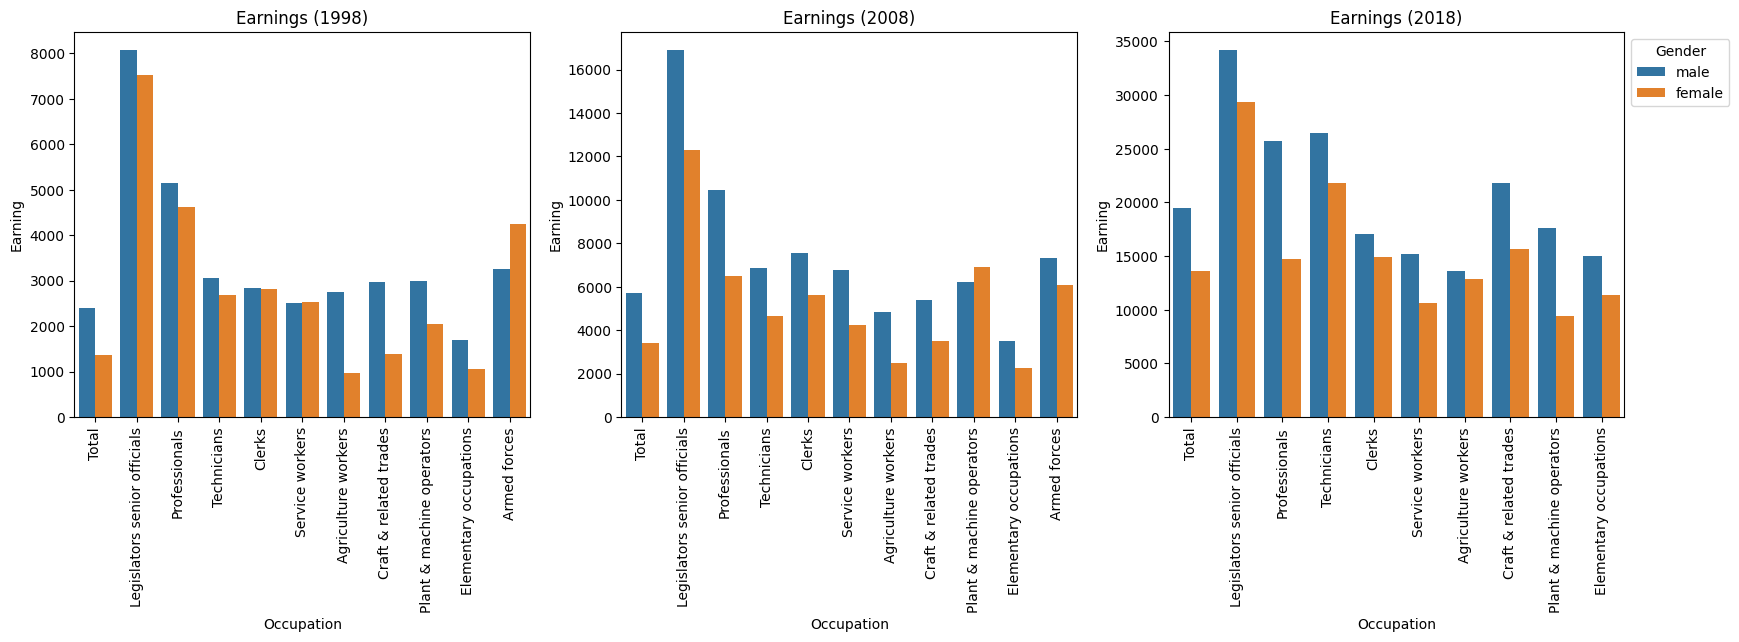

In [281]:

datasets = [
    (modified_earning_1998_df, "Earnings (1998)"),
    (modified_earning_2008_df, "Earnings (2008)"),
    (modified_earning_2018_df, "Earnings (2018)")
]

fig,ax =plt.subplots(1,3,figsize = (20,5))

for i, (df, title) in enumerate(datasets):
    sns.barplot(df, x = 'Occupation', y = 'Earning', hue='gender', ax= ax[i])
    ax[i].tick_params(axis="x",rotation = 90)
    ax[i].set_title(title)
    if i != 2:
        ax[i].get_legend().set_visible(False)

# Show legend only on the last subplot
ax[2].legend(title='Gender', loc='upper left',bbox_to_anchor=(1,1))



/var/folders/q1/kx11j8ln18l7hx1kpcdc13l80000gn/T/ipykernel_43167/2735780711.py:5: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  sns.lineplot(data=earning_nepal_df, x='year', y='Total', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[0], legend = False)
/var/folders/q1/kx11j8ln18l7hx1kpcdc13l80000gn/T/ipykernel_43167/2735780711.py:11: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  sns.lineplot(data=earning_nepal_df, x='year', y='Male', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[1], legend = False)
/var/folders/q1/kx11j8ln18l7hx1kpcdc13l80000gn/T/ipykernel_43167/2735780711.py:18: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  sns.lineplot(data=earning_nepal_df, x='year', y='Female', hue='Occupation', linestyle="dashed", marker="o", palette=s

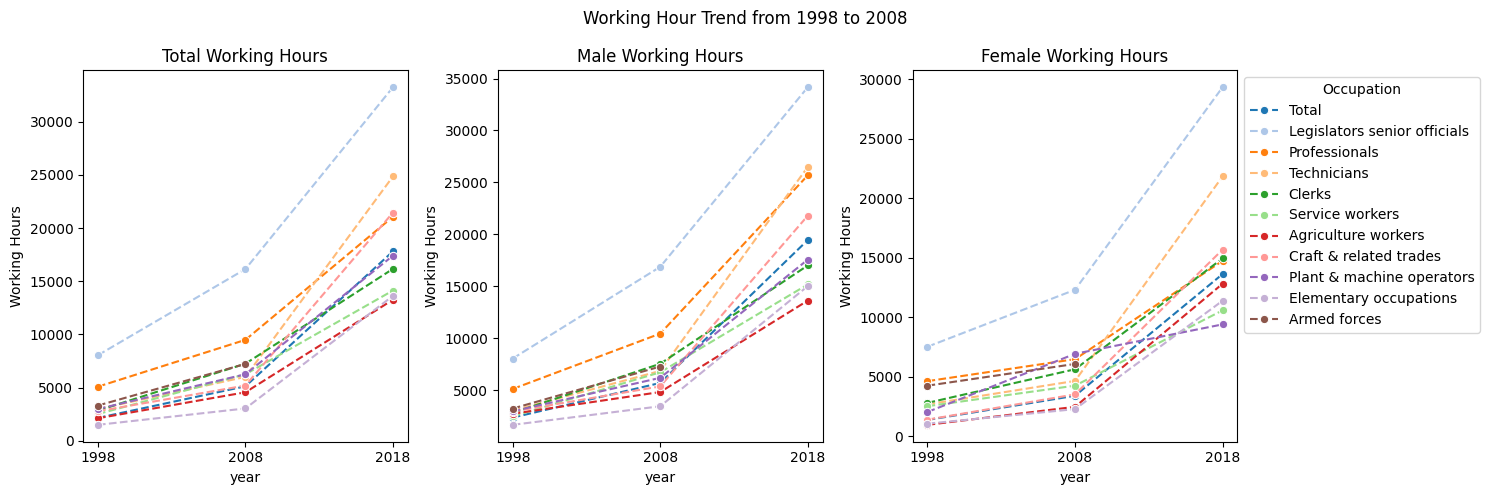

In [287]:
# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Total (without individual legend)
sns.lineplot(data=earning_nepal_df, x='year', y='Total', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[0], legend = False)
axes[0].set_title('Total Working Hours')
axes[0].set_xticks([1998, 2008, 2018])
axes[0].set_ylabel('Working Hours')

# Plot Male (without individual legend)
sns.lineplot(data=earning_nepal_df, x='year', y='Male', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[1], legend = False)
axes[1].set_title('Male Working Hours')
axes[1].set_xticks([1998, 2008, 2018])
axes[1].set_ylabel('Working Hours')


# Plot Female (without individual legend)
sns.lineplot(data=earning_nepal_df, x='year', y='Female', hue='Occupation', linestyle="dashed", marker="o", palette=sns.color_palette("tab20"), ax=axes[2])
axes[2].set_title('Female Working Hours')
axes[2].set_xticks([1998, 2008, 2018])
axes[2].set_ylabel('Working Hours')
axes[2].legend(title = "Occupation", loc = "upper left", bbox_to_anchor=(1,1))


# Set the main title
plt.suptitle('Working Hour Trend from 1998 to 2008')

# Adjust layout for better spacing
plt.tight_layout()


# Show the plot
plt.show()

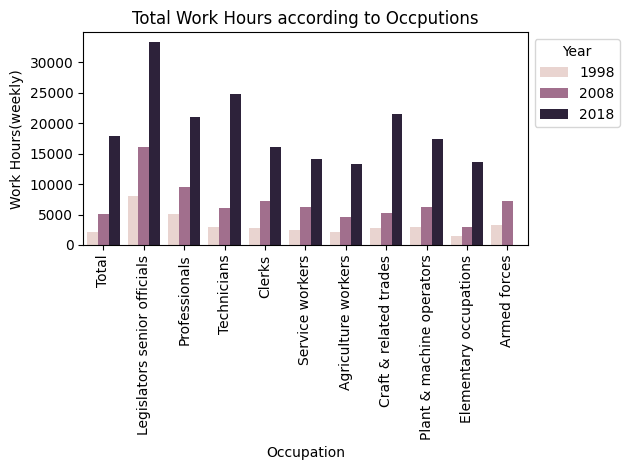

In [288]:
sns.barplot(data=earning_nepal_df, x="Occupation", y="Total", hue='year')
plt.legend(title = "Year", loc = "upper left", bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.ylabel('Work Hours(weekly)')
plt.title("Total Work Hours according to Occputions")
plt.tight_layout()
plt.show()

# Now Lets see if there is any correlation between total work hour and salary

In [289]:
combined_df = pd.DataFrame()
combined_df['Occupation'] = workhr_nepal_df['Occupation']
combined_df['Total_workhr'] = workhr_nepal_df['Total']
combined_df['Male_workhr'] = workhr_nepal_df['Male']
combined_df['Female_workhr'] = workhr_nepal_df['Female']
combined_df['Total_earning'] = earning_nepal_df['Total']
combined_df['Male_earning'] = earning_nepal_df['Male']
combined_df['Female_earning'] = earning_nepal_df['Female']
combined_df['year'] = earning_nepal_df['year']
combined_df.head()

,Occupation,Total_workhr,Male_workhr,Female_workhr,Total_earning,Male_earning,Female_earning,year
0,Total,39.4,42.6,36.3,2143,2389,1368,1998
1,Legislators senior officials,51.0,51.8,41.4,8037,8068,7525,1998
2,Professionals,39.7,40.1,36.3,5079,5141,4631,1998
3,Technicians,39.5,39.6,39.0,2971,3057,2678,1998
4,Clerks,44.1,44.4,41.6,2832,2836,2805,1998


<Axes: xlabel='Total_workhr', ylabel='Total_earning'>

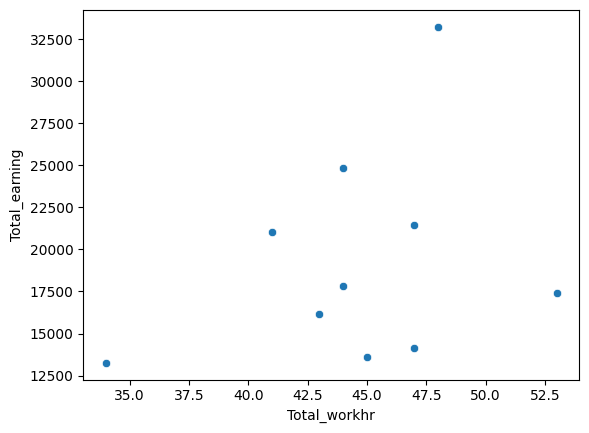

In [291]:
combined_2018_df = combined_df[combined_df['year'] == 2018]
sns.scatterplot(data=combined_2018_df, x='Total_workhr', y = 'Total_earning')

In [292]:
correlation = combined_2018_df['Total_workhr'].corr(combined_2018_df['Total_earning'])

In [293]:
correlation

np.float64(0.29718472572644455)